# Aproximación a la calidad de datos

La página https://data.buenosaires.gob.ar/dataset/presupuesto-ejecutado contiene información referida a la ejecución presupuestaria de la ciudad de Buenos Aires. Elijan el archivo correspondiente al trimestre del mes del cumpleaños del año 2018 del integrante más joven del equipo y resuelvan los siguientes ítems.

a) Lean la documentación sobre que representan las variables que funciona en la misma página.
Analicen el dataset, como puede observar hay varias variables que funcionan de a pares, por ejemplo (car y car_desc). Analicen si existe correspondencia entre esos pares. Tengan en cuenta que en algunos casos existe una jerarquía.

b) Efectuar una apreciación sobre el nivel de cada una de las cualidades intrínsecas de calidad para este conjunto de datos. ¿Qué puede decir particularmente de la consistencia?

c) Efectuar un análisis descriptivo de cada una de las variables, incluyendo el % de datos faltantes

d) Efectuar un análisis bivariado de dos variables categóricas, dos numéricas y una numérica y una categórica

e) ¿Cuáles son los elementos que más le llaman la atención?

In [29]:
%matplotlib inline
%reload_ext autoreload
%autoreload
SEED = 1234
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, HTML
from time import time
import numpy as np
import numpy.ma as ma
np.set_printoptions(precision=4)
np.random.seed(SEED)
import pandas as  pd
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 44)
pd.set_option('precision', 8)
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
presupuesto = pd.read_csv("presupuesto-ejecutado-2018-segundo-trimestre.csv")

## Analisis

Cargamos le archivo en un dataframe e imprimimos en pantalla un grupo de filas del dataset para ver como vienen los datos.

In [31]:
display(presupuesto)

,Car,Car_desc,Jur,Jur_desc,Sjur,Sjur_desc,Ent,Ent_desc,Og,Og_desc,UE,UE_desc,Prog,Prog_desc,Sprog,Sprog_desc,Proy,Proy_desc,Actividad,Act_desc,Ob,ob_desc,Fin,Fin_desc,Fun,Fun_desc,Inc,Inc_desc,Ppal,Ppal_desc,Par,Par_desc,Spar,Spar_desc,Eco,Eco_desc,Fte,Fte_desc,Geo,Geo_desc,Sanción,Vigente,Definitivo,Devengado
0,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,1,Retribución Del Cargo,0,Retribución Del Cargo,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,958764741,958764741,4.01819136e+08,4.01819136e+08
1,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,4,Sueldo Anual Complementario,0,Sueldo Anual Complementario,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,79897062,79897062,3.23499930e+05,3.23499930e+05
2,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,1,Personal Permanente,6,Contribuciones Patronales,0,Contribuciones Patronales,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,208100268,208100268,8.09258507e+07,8.09258507e+07
3,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,2,Personal Transitorio,1,Retribución Del Cargo,0,Retribución Del Cargo,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,830336506,830336506,3.61724946e+08,3.61724946e+08
4,1,Administracion Central,1,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,0,Legislatura De La Ciudad De Buenos Aires,1,Legislatura De La Ciudad De Buenos Aires,10,Secretaria Administrativa,16,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,0,Formacion Y Sancion De Leyes,1000,Conducción,0,Conducción,1,Administración Gubernamental,1,Legislativa,1,Gastos En Personal,2,Personal Transitorio,4,Sueldo Anual Complementario,0,Sueldo Anual Complementario,21200000,Remuneraciones Al Personal,11,Tesoro De La Ciudad,1,Comuna 1,69194709,69194709,7.32749670e+05,7.32749670e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48796,2,Organismos Descentralizados,8,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,0,Sindicatura General De La Ciudad De Buenos Aires,8,Sindicatura General De La Ciudad De Buenos Aires,81,Sindicatura General De La Ciudad De Buenos Aires,16,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control Interno Del Gobierno Central Y Organismos Descentralizados.,0,Control 

Visualizamos la estructura de tablas del dataframe para empezar a comprender las relaciones entre los datos.

In [32]:
presupuesto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48801 entries, 0 to 48800
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Car         48801 non-null  int64  
 1   Car_desc    48801 non-null  object 
 2   Jur         48801 non-null  int64  
 3   Jur_desc    48801 non-null  object 
 4   Sjur        48801 non-null  int64  
 5   Sjur_desc   48801 non-null  object 
 6   Ent         48801 non-null  int64  
 7   Ent_desc    48801 non-null  object 
 8   Og          48801 non-null  int64  
 9   Og_desc     48801 non-null  object 
 10  UE          48801 non-null  int64  
 11  UE_desc     48801 non-null  object 
 12  Prog        48801 non-null  int64  
 13  Prog_desc   48801 non-null  object 
 14  Sprog       48801 non-null  int64  
 15  Sprog_desc  48801 non-null  object 
 16  Proy        48801 non-null  int64  
 17  Proy_desc   48801 non-null  object 
 18  Actividad   48801 non-null  int64  
 19  Act_desc    48801 non-nul

Consultando la metadata de la tabla, analizando los datos y la nomenclatura usada para nombrar las columnas de las tablas, se desprende que dado un campo X y X_desc están relacionados de forma tal que X representa un código y X_desc su descripción. Combinados estos campos representan un tipo de variable Categorico Nominal.

Los campos Sanción, Vigente, Definitivo y Devengado representan variables Numericas. Aunque la documentación indique que contiene valores enteros, Definitivo y Devengado contienen valores numéricos flotantes.

Una inconsitencia que notamos tras ver los datos, es que se deja implicito que la moneda es Pesos pero debería estar explicito.

### Significado de cada Campo: según documentación e interpretación

**car**	Número entero (integer)

**car_desc**	Texto (string)

Carácter. Son los agrupamientos en los que se divide la Administración Gubernamental

-----------------------------------------------
**jur**	Número entero (integer)

**jur_desc**	Texto (string)

Jurisdicción. Son Organizaciones públicas

-----------------------------------------------
**sjur**	Número entero (integer)

**sjur_desc**	Texto (string)

Subjurisdicción. Son Unidades institucionales pertenecienten a una Jurisdicción

-----------------------------------------------
**ent**	Número entero (integer)

**ent_desc**	Texto (string)


Entidad. Son organizaciones públicas con personería juridica.

-----------------------------------------------
**ogese**	Número entero (integer)

**ogese_desc**	Texto (string)

Oficinas de Gestión Sectorial. Coordinan la información financiera de las Jurisdicciones

-----------------------------------------------
**ue**	Número entero (integer)

Unidad Ejecutora

-----------------------------------------------
**prog**	Número entero (integer)

**prog_desc**	Texto (string)

Programa. Es una asignación formal de recursos

-----------------------------------------------
**sprog**	Número entero (integer)

**sprog_desc**	Texto (string)

Sub-Programa. Precisa con mayor desagregación la producción del Programa

-----------------------------------------------
**proy**	Número entero (integer)

**proy_desc**	Texto (string)

Proyecto. Proceso de produccion de un bien de capital

-----------------------------------------------
**act**	Número entero (integer)

**act_desc**	Texto (string)

Actividad. 

-----------------------------------------------
**obra**	Número entero (integer)

**obra_desc**	Texto (string)

Obra. Desagregación de un Proyecto

-----------------------------------------------
**fin**	Número entero (integer)

**fin_desc**	Texto (string)

Finalidad. Es un criterio de clasificación del gasto

-----------------------------------------------
**fun**	Número entero (integer)

**fun_desc**	Texto (string)

Función.

-----------------------------------------------
**inciso**	Número entero (integer)

**inciso_desc**	Texto (string)

Inciso. Nivel superior de los 4 niveles de cuentas que conforman el objeto de gasto

-----------------------------------------------
**ppal**	Número entero (integer)

**ppal_desc**	Texto (string)

Partida Principal. Segundo grado de los 4 niveles que conforma el objeto de gasto

-----------------------------------------------
**parc**	Número entero (integer)

**parc_desc**	Texto (string)

Partida Parcial. Tercer grado de los 4 niveles que conforma el objeto de gasto

-----------------------------------------------
**sparc**	Número entero (integer)

**sparc_desc**	Texto (string)

Partida Sub-Parcial. Primer grado de los 4 niveles que conforman el objeto de gasto

-----------------------------------------------
**eco**	Número entero (integer)

**eco_desc**	Texto (string)

Clasificador Económico. 

-----------------------------------------------
**ff**	Número entero (integer)

**ff_desc**	Texto (string)

Fuente de Financiamiento.

-----------------------------------------------
**geo**	Número entero (integer)

**geo_desc**	Texto (string)

Úbicación Geográfica.Permite ver la distribución espacial de las transacciones economicas-financieras que realizan los organismos del Sector Público.

-----------------------------------------------
**Sanción**	Número entero (integer)

Crédito Sancionado. Es el crédito aprobado por la Ley de Presupuesto

-----------------------------------------------
**vigente**	Número entero (integer)

Credito Sancionado Vigente. Es el mismo crédito pero modificado según el presupuesto del ejercicio corriente.

-----------------------------------------------
**definitivo**	Número entero (integer)

Es aquel que se usa para relaciones juridicas con terceros que genera salida de fondos (ej: para pagar una deuda, para una inversión en un objeto determinado).

-----------------------------------------------
**devengado**	Número entero (integer)

Es una obligación de pago por haber cumplido requisitos administrativos o por la recepción de bienes o servicios

-----------------------------------------------

Los metadatos de la tabla definen relaciones jerarquicas entre los campos JUR con SJUR, donde combinados con el campo CAR describen la jerarquía del Gobierno de la Ciudad para este dataset.


In [33]:
df_car = presupuesto[["Car_desc", "Jur_desc", "Sjur_desc"]].drop_duplicates()
#pd.set_option('display.max_rows', 38)
display(df_car)

,Car_desc,Jur_desc,Sjur_desc
0,Administracion Central,Legislatura De La Ciudad De Buenos Aires,Legislatura De La Ciudad De Buenos Aires
75,Administracion Central,Jefatura De Gobierno,Jefatura De Gobierno
512,Administracion Central,Jefatura De Gobierno,Vicejefatura De Gobierno
1860,Administracion Central,Jefatura De Gobierno,Sec.Gral. Y Realaciones Internacionales
2534,Administracion Central,Jefatura De Gobierno,Secretaria Legal Y Tecnica
2975,Administracion Central,Jefatura De Gobierno,Secretaria De Medios
3425,Administracion Central,Jefatura De Gabinete De Ministros,Jefatura De Gabinete De Ministros
5383,Administracion Central,Ministerio De Justicia Y Seguridad,Ministerio De Justicia Y Seguridad
7219,Administracion Central,Ministerio De Justicia Y Seguridad,Plan De Seguridad Publica
9014,Administracion Central,Ministerio De Gobierno,Ministerio De Gobierno


Este grupo de campos describe las dependencias de cada jurisdicción.

Además encontramos que los Programas llevados a cabo por las oficinas OGESE tienen una estructura jerarquica entre los campos PROG, SPROG, PROY, ACT y OBRA

In [34]:
df_programa = presupuesto[["Prog_desc","Sprog_desc","Proy_desc","Act_desc","ob_desc"]]
df_programa = df_programa.drop_duplicates()
display(df_programa)

,Prog_desc,Sprog_desc,Proy_desc,Act_desc,ob_desc
0,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Conducción,Conducción
73,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Restauracion De Fachadas Palacio De La Legislatura
74,Formacion Y Sancion De Leyes,Formacion Y Sancion De Leyes,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Reparacion Y Puesta En Valor Edificio De La Legislatura De La Ciudad De Buenos Aires,Reordenamiento Y Diseño Para Nueva Distribucion De Despachos
75,Conduccion Superior,Conduccion Superior,Conduccion Superior,Conduccion,Conduccion
115,Conduccion Superior,Conduccion Superior,Conduccion Superior,Administracion Y Servicios Generales,Administracion Y Servicios Generales
...,...,...,...,...,...
48707,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Sigeci Mantenimiento,Sigeci Mantenimiento
48708,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Coordinación Y Supervisión Uais,Coordinación Y Supervisión Uais
48722,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Administración Y Servicios Generales,Administración Y Servicios Generales
48780,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Control Interno Del Gobierno Central Y Organismos Descentralizados.,Palacio Lezama,Palacio Lezama


Siendo las obras ejecutadas en el marco de una actividad que pertenece a un proyecto que depende de un programa.

Para definir el tipo de gasto que corresponde la obra se utiliza una relación entre los campos Inc, Ppal, Par, Spar

In [35]:
df_partida = presupuesto[["Inc_desc","Ppal_desc","Par_desc","Spar_desc"]]
df_partida = df_partida.drop_duplicates()
display(df_partida)

,Inc_desc,Ppal_desc,Par_desc,Spar_desc
0,Gastos En Personal,Personal Permanente,Retribución Del Cargo,Retribución Del Cargo
1,Gastos En Personal,Personal Permanente,Sueldo Anual Complementario,Sueldo Anual Complementario
2,Gastos En Personal,Personal Permanente,Contribuciones Patronales,Contribuciones Patronales
3,Gastos En Personal,Personal Transitorio,Retribución Del Cargo,Retribución Del Cargo
4,Gastos En Personal,Personal Transitorio,Sueldo Anual Complementario,Sueldo Anual Complementario
...,...,...,...,...
45241,Gastos En Personal,Gabinete De Autoridades Superiores,Retribuciones Que No Hacen Al Cargo,Retribuciones Que No Hacen Al Cargo
45243,Gastos En Personal,Gabinete De Autoridades Superiores,Otros Gastos En Personal,Otros Gastos En Personal
45304,Servicios No Personales,"Impuestos, Derechos, Tasas Y Juicios",Multas Y Recargos,"Multas,Rec.Y Gs.Jud.Def.Pueb."
45321,Transferencias,Transferencias Al Exterior,Transf.A Organismos Internacionales Para Financiar Gastos Corrientes,No Especificada


Con estos campos se puede ver el detalle de los gastos que ocaciono la obra.

## Graficas

KeyError: 'Administracion Central'

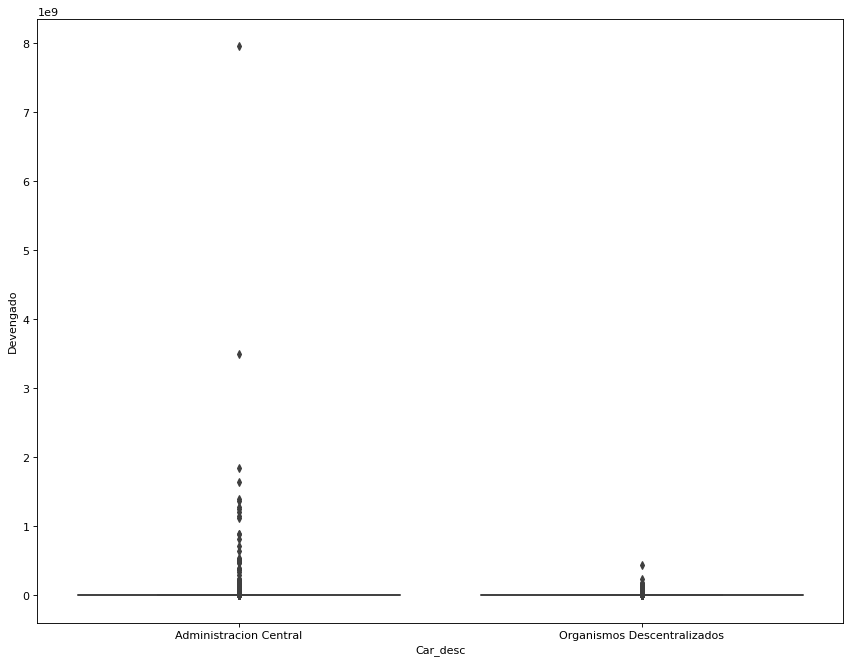

In [36]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='Car_desc', y='Devengado', data=presupuesto, notch=False)

# Add N Obs inside boxplot (optional)
def add_n_obs(df,group_col,y):
    medians_dict = {grp[0]:grp[1][y].median() for grp in df.groupby(group_col)}
    xticklabels = [x.get_text() for x in plt.gca().get_xticklabels()]
    n_obs = df.groupby(group_col)[y].size().values
    for (x, xticklabel), n_ob in zip(enumerate(xticklabels), n_obs):
        plt.text(x, medians_dict[xticklabel]*1.01, "#obs : "+str(n_ob), horizontalalignment='center', fontdict={'size':14}, color='white')

add_n_obs(presupuesto,group_col='Car',y='Devengado')    

# Decoration
plt.title('Agrupamientos de la administración gubernamental', fontsize=22)
plt.xlabel("")
plt.show()

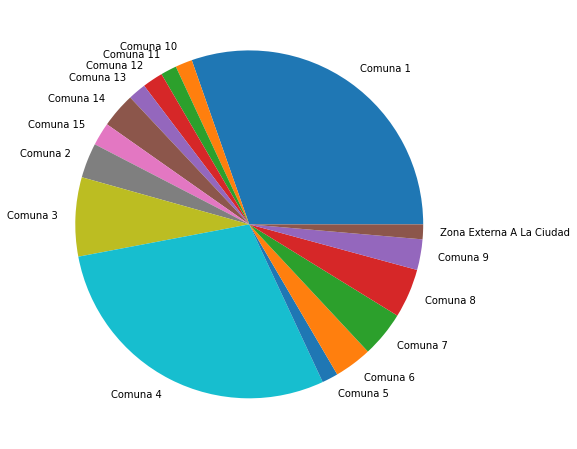

In [37]:
# Prepare Data
df = presupuesto.groupby('Geo_desc').sum()

df.plot.pie(y='Devengado', figsize=(8, 8), legend=False)
plt.ylabel("")
plt.show()

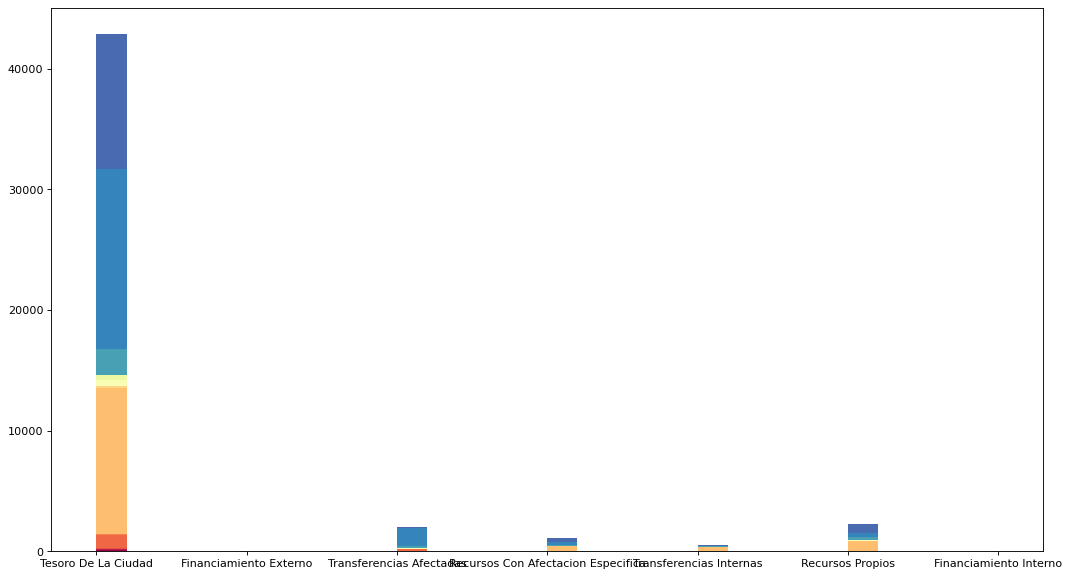

In [38]:
df = presupuesto
x_var = 'Fte_desc'
groupby_var = 'Eco_desc'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])
plt.show()


## Cualidades intrinsecas de la calidad

### Precisión

### Completitud

### Consistencia

### Unicidad

### Actualidad